<a href="https://colab.research.google.com/github/Khuzamaalk/T5_BootCamp/blob/main/M_CNN_Exercise_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN) using Keras
This notebook will guide you through the process of creating a CNN model using Keras. Follow the steps and fill in the code blocks as you progress.

# Dataset Card: Men vs. Women Classification

## Overview
The Men vs. Women Classification dataset contains images of men and women intended for binary image classification tasks. The goal is to classify images based on gender.

- **Dataset URL:** [Men vs. Women Classification Dataset](https://www.kaggle.com/datasets/saadpd/menwomen-classification)
- **Dataset Size:** ~845 MB
- **Classes:** 2 (Men, Women)
- **Image Format:** JPEG

## Structure

### Folders
The dataset is organized into two main folders:

- `traindata/`:
  - `traindata/`: Contains the training images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

- `testdata/`:
  - `testdata/`: Contains the testing images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

### Example Files
Here are some example file names you might find in the dataset:

- `traindata/traindata/men/000000899.jpg`
- `traindata/traindata/women/00000001.jpg`
- `testdata/testdata/men/00000504.jpg`
- `testdata/testdata/women/00000002.jpg`

### Image Specifications
- **Resolution:** Varies
- **Color:** RGB

## Usage
This dataset is ideal for practicing binary image classification using Convolutional Neural Networks (CNNs). It can be used to train a model to distinguish between images of men and women.

## Step 1: Import Required Libraries
Begin by importing the necessary libraries.

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
!kaggle datasets download -d saadpd/menwomen-classification

Dataset URL: https://www.kaggle.com/datasets/saadpd/menwomen-classification
License(s): copyright-authors
 99% 801M/806M [00:09<00:00, 80.7MB/s]
100% 806M/806M [00:09<00:00, 93.0MB/s]


In [4]:
import zipfile
with zipfile.ZipFile('menwomen-classification.zip', 'r') as zip_ref:
    zip_ref.extractall()

print("Dataset downloaded and extracted successfully.")

Dataset downloaded and extracted successfully.


In [5]:
import os
os.listdir()

['.config',
 'menwomen-classification.zip',
 'testdata',
 'traindata',
 'sample_data']

In [6]:
X_train = 'traindata/traindata'
X_test = 'testdata/testdata'

In [11]:
img_height=224
img_width=224
batch_size=32

## Step 2: Load and Preprocess Data
Load your dataset and preprocess it. This may include resizing images, normalizing pixel values, and splitting the data into training and validation sets.

In [27]:
# Load and preprocess the data
# Hint: Use ImageDataGenerator for image preprocessing
# Example:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory('/content/traindata/traindata', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory('/content/testdata/testdata', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='validation')

Found 2313 images belonging to 2 classes.
Found 265 images belonging to 2 classes.


## Step 3: Data Augmentation
To prevent overfitting, augment your data using various transformations like rotation, zoom, flip, etc.

In [28]:
# Data Augmentation
# Example:
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

## Step 4: Build the CNN Model
Define the architecture of your CNN model. Start with convolutional layers followed by pooling layers, and end with fully connected layers.

In [29]:
# Build the model
# Example:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax') #---I changed the parameter (num_classes) and put 2 bcz we have two classes men and women
 ])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Compile the Model
Compile your model by specifying the optimizer, loss function, and evaluation metrics.

In [30]:
# Compile the model
# Example:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Step 6: Train the Model
Train your model using the training data and validate it using the validation data.

In [32]:
# Train the model
# Example:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - accuracy: 0.9956 - loss: 0.0208 - val_accuracy: 0.7208 - val_loss: 1.2154
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.9942 - loss: 0.0354 - val_accuracy: 0.7208 - val_loss: 1.1872
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.9973 - loss: 0.0166 - val_accuracy: 0.7094 - val_loss: 1.4495
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - accuracy: 0.9971 - loss: 0.0141 - val_accuracy: 0.6868 - val_loss: 1.3961
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - accuracy: 0.9961 - loss: 0.0204 - val_accuracy: 0.7132 - val_loss: 1.3903
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - accuracy: 0.9961 - loss: 0.0141 - val_accuracy: 0.7321 - val_loss: 1.5488
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - accuracy: 0.9948 - loss: 0.0275 - val_accuracy: 0.7094 - val_loss: 1.4339
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.9967 - loss: 0.0136 - val_accuracy: 0.7208 - v

## Step 7: Evaluate the Model
Evaluate the performance of your model using the validation set.

In [33]:
# Evaluate the model
# Example:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 906ms/step - accuracy: 0.6783 - loss: 1.7893
Validation Loss: 1.6195083856582642
Validation Accuracy: 0.6867924332618713


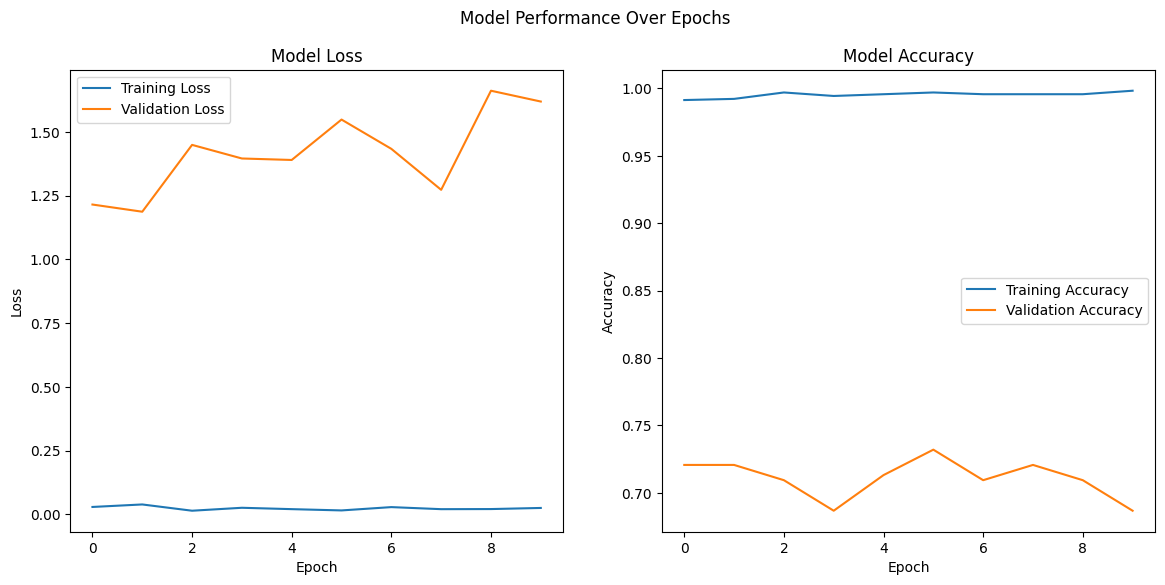

In [38]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit() containing the training history

plt.figure(figsize=(14, 6))  # Set the figure size

# Subplot 1: Loss
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Add an overall title for the figure
plt.suptitle('Model Performance Over Epochs')

# Show the plot
plt.show()


## Step 8: Save the Model
Finally, save your trained model for future use.

In [39]:
# Save the model
# Example:
model.save('my_cnn_model.h5')